

>  ## ***`Task 2: Support Vector Machine (SVM) for Classification`*** ##

---
```Description:```

` Implement a Support Vector Machine (SVM) model for binary classification.`

---
```Objectives:```

```
1.  Train an SVM model on a labeled dataset.
2.  Use different kernels (linear, RBF) and compare
    performance.
3.  Visualize the decision boundary.
4.  Evaluate the model using accuracy, precision, recall,
    and AUC.
```

---

`Tools: Python, scikit-learn, pandas.`

`Using churn-bigml-80 dataset.`

### ***1- Import pre-processing libs*** ###

In [1]:
! pip install scikit-learn matplotlib pandas mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report,confusion_matrix,f1_score
from sklearn.metrics import RocCurveDisplay,roc_curve
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification

### ***2- Import and Load Data*** ###

In [3]:
df = pd.read_csv(r'D:\Abdelraouf\Quran\Codveda-ML-Internship\DataSet-For-Tasks\Churn-Prdiction-Data\churn-bigml-80.csv')

In [4]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


### ***3- Exploring Data*** ###

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [9]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [10]:
df.shape

(2666, 20)

### ***4- Data Preprocessing*** ###

In [11]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [12]:
df.drop(columns=['Area code', 'State'], inplace=True)

In [13]:
df.dtypes

Account length              int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [14]:
df['International plan'].value_counts()

International plan
No     2396
Yes     270
Name: count, dtype: int64

In [15]:
df['Voice mail plan'].value_counts()

Voice mail plan
No     1933
Yes     733
Name: count, dtype: int64

In [16]:
df['Churn'].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

### ***5_ Data Encoding*** ###

In [17]:
le = LabelEncoder() # Label Encoder to convert categorical variables to numerical 
df["International plan"] = le.fit_transform(df["International plan"])
df['Voice mail plan'] = le.fit_transform(df['Voice mail plan'])
df['Churn'] = le.fit_transform(df['Churn'])

In [18]:
df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### ***6_ Feature & Target Selection*** ###

In [19]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [20]:
X

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [21]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: Churn, Length: 2666, dtype: int64

### ***7_ Spliting the dataset into the Training set and Test set*** ###

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2132, 17), (534, 17), (2132,), (534,))

### ***8_ Scaling Data*** ###

In [24]:
scaler = StandardScaler() # Scale numerical features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[ 0.70754167, -0.33662431, -0.62291318, ...,  0.61677678,
         0.48710358,  0.3481153 ],
       [-0.58381244, -0.33662431, -0.62291318, ...,  0.61677678,
         0.22991391, -0.42338348],
       [-1.67260119, -0.33662431, -0.62291318, ..., -0.99915944,
         0.04040572,  2.66261165],
       ...,
       [-1.03958447, -0.33662431, -0.62291318, ...,  0.61677678,
         1.80012455,  0.3481153 ],
       [-0.43188842, -0.33662431, -0.62291318, ...,  0.21279273,
         1.09623702,  0.3481153 ],
       [-0.40656775, -0.33662431, -0.62291318, ..., -0.19119133,
         1.13684591,  0.3481153 ]])

In [26]:
X_test

array([[ 3.53052307e-01,  2.97067076e+00, -6.22913183e-01, ...,
         1.42474489e+00,  5.95393968e-01, -4.23383478e-01],
       [ 1.41652039e+00,  2.97067076e+00, -6.22913183e-01, ...,
         2.12792726e-01, -6.49945506e-01, -1.19488226e+00],
       [-4.31888423e-01, -3.36624311e-01, -6.22913183e-01, ...,
         2.12792726e-01,  7.71365850e-01, -4.23383478e-01],
       ...,
       [ 7.58183007e-01, -3.36624311e-01, -6.22913183e-01, ...,
        -5.95175382e-01,  8.10146203e-02, -1.19488226e+00],
       [-2.54643742e-01, -3.36624311e-01,  1.60536015e+00, ...,
        -1.91191328e-01,  2.56986502e-01, -4.23383478e-01],
       [ 7.07541670e-01, -3.36624311e-01, -6.22913183e-01, ...,
         6.16776780e-01, -2.03171462e-04, -4.23383478e-01]])

### ***9- Train & Evaluate the SVM Model*** ###

In [27]:
# Define kernels to compare
kernels = ['linear', 'rbf']
results = {}

In [28]:
# Train and evaluate SVM models for each kernel
for kernel in kernels:
    # Initialize and train SVM model
    svm = SVC(kernel=kernel, probability=True, random_state=42)
    svm.fit(X_train, y_train)
    
    # Make predictions
    y_pred = svm.predict(X_test)
    y_pred_proba = svm.predict_proba(X_test)[:, 1]
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[kernel] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'auc': auc,
        'model': svm
    }

In [29]:
 # Print classification report
print(f"\nClassification Report for {kernel} kernel:\n")
print(classification_report(y_test, y_pred))    


Classification Report for rbf kernel:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       455
           1       0.87      0.43      0.58        79

    accuracy                           0.91       534
   macro avg       0.89      0.71      0.76       534
weighted avg       0.90      0.91      0.89       534



In [30]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[450   5]
 [ 45  34]]


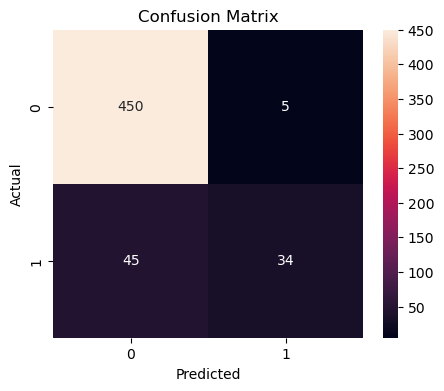

In [31]:
# visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
# Compare performance
print("\nPerformance Comparison:")
for kernel, metrics in results.items():
    print(f"\n{kernel.capitalize()} Kernel:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"AUC: {metrics['auc']:.4f}")


Performance Comparison:

Linear Kernel:
Accuracy: 0.8521
Precision: 0.0000
Recall: 0.0000
AUC: 0.7200

Rbf Kernel:
Accuracy: 0.9064
Precision: 0.8718
Recall: 0.4304
AUC: 0.8913


### ***10_ Visualizing the results of the SVM classifier*** ###

In [33]:
# Visualize decision boundaries using only Feature_1 and Feature_2
def plot_decision_boundary(X, y, model, kernel, scaler):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Scale the mesh grid points using the scaler fitted on 2 features
    mesh_points = scaler.transform(np.c_[xx.ravel(), yy.ravel()])  # Ensure 2 features for transformation
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)

In [34]:
# Cross-validation scores
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
    print(f"\nCross-Validation Accuracy Scores for {kernel} kernel: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")



Cross-Validation Accuracy Scores for linear kernel: [0.85480094 0.85480094 0.85680751 0.85446009 0.85446009]
Mean CV Accuracy: 0.8551 (±0.0009)

Cross-Validation Accuracy Scores for rbf kernel: [0.91569087 0.90632319 0.9084507  0.92018779 0.9084507 ]
Mean CV Accuracy: 0.9118 (±0.0053)


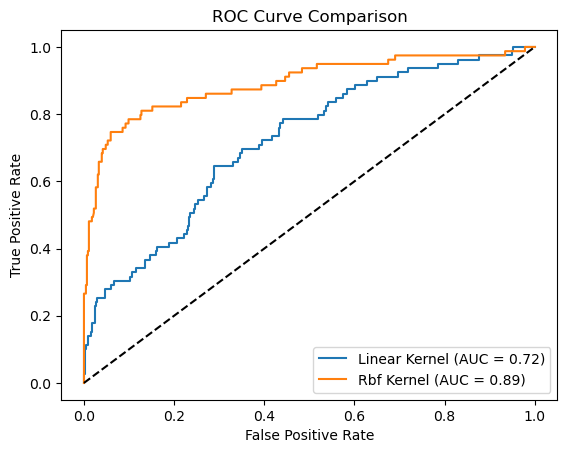

In [35]:
# ROC Curve for each kernel
plt.figure()
for kernel in kernels:
    y_pred_proba = results[kernel]['model'].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{kernel.capitalize()} Kernel (AUC = {results[kernel]["auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

## Conclusion ##

**In this script, we implemented a Support Vector Machine (SVM) model for binary classification using a synthetic dataset with only the first two features for visualization. The main steps included:**

---

```
1. Generated a synthetic dataset for binary classification with two features (Feature_1 and Feature_2).
2. Preprocessed the data by scaling features using StandardScaler.
3. Split the data into training and testing sets, using only the first two features.
4. Trained SVM models with linear and RBF kernels and compared their performance.
5. Evaluated the models using accuracy, precision, recall, and AUC metrics.
6. Visualized decision boundaries for both kernels using only Feature_1 and Feature_2 to understand classification behavior.
7. Performed cross-validation to assess model robustness.
8. Plotted ROC curves to compare the discriminative ability of both models.
```

---

**The linear and RBF kernels were compared, with performance metrics and visualizations providing insights into their effectiveness. The decision boundary plots, limited to Feature_1 and Feature_2, helped illustrate how each kernel separates the classes, and the ROC curves highlighted their ability to distinguish between classes.**